In [80]:
library(broom)
library(ggplot2)
options(repr.plot.width=6, repr.plot.height=5)

### Мультиколлинеарность

Генерируем данные

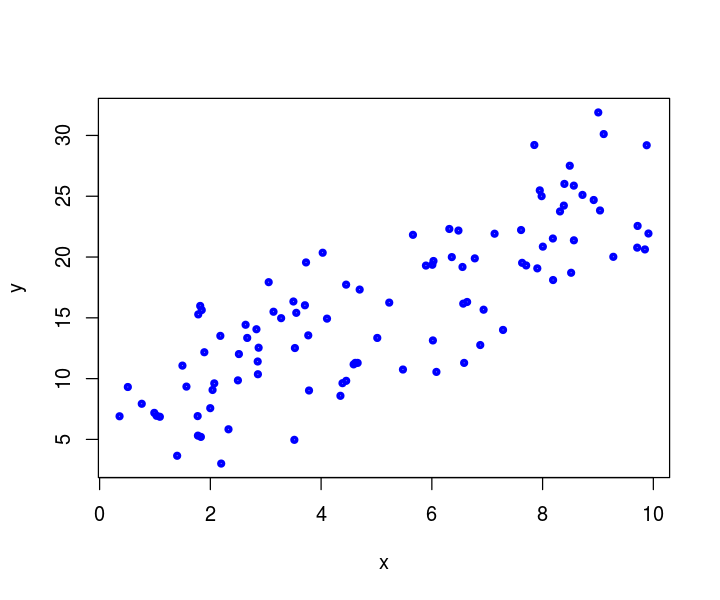

In [84]:
x <- runif(n = 100, min = 0, max = 10)
epsilon <- rnorm(n = 100, sd = 4)
y <- 5 + 2 * x + epsilon

t <- data.frame(matrix(ncol = 2, data = c(x, y)))
colnames(t) <- c('x', 'y')

plot(x, y, cex = 0.5, col = 'blue', lwd = 3)

Приблизим полиномом 25 степени!

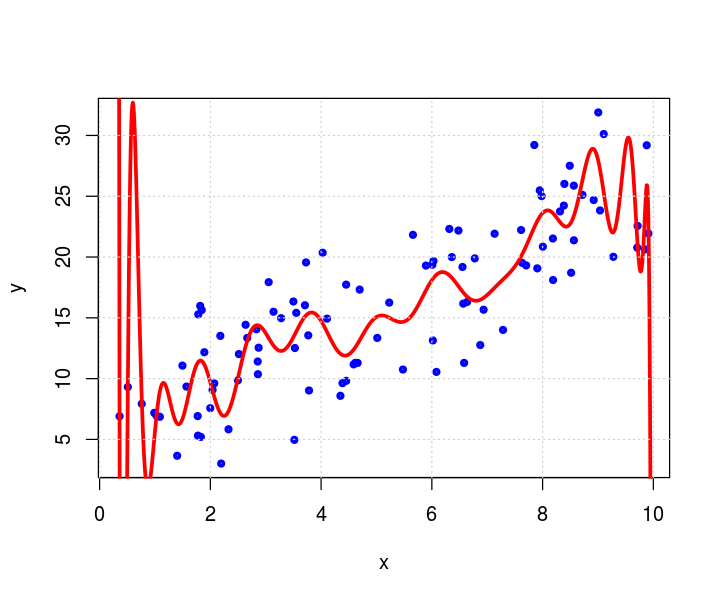

In [85]:
model <- lm(formula = y ~ poly(x, 25), data = t)

grid <- seq(from = 0, to = 10, by = 0.01)
test <- data.frame(matrix(ncol = 1, data = grid))
colnames(test) <- c('x')
pred <- predict(model, test)


plot(x, y, cex = 0.5, col = 'blue', lwd = 3)
points(pred ~ grid, type = 'l', lwd = 3, col = 'red')
grid()

Применяем ridge-регрессию

In [95]:
library("MASS")

lambdas <- seq(1, 100, by = 1)
m.rr <- lm.ridge(y ~ poly(x, 25), lambda = lambdas, data = t)

Оптимальное лямбда и коэффициенты линейной модели

In [101]:
m.rr$lambda[which.min(m.rr$GCV)]
m.rr$coef[,which.min(m.rr$GCV)]

[1] 12

poly(x, 25)1  poly(x, 25)2  poly(x, 25)3  poly(x, 25)4  poly(x, 25)5 
  4.749584203   0.231278229  -0.009096326  -0.618180080  -0.685439753 
 poly(x, 25)6  poly(x, 25)7  poly(x, 25)8  poly(x, 25)9 poly(x, 25)10 
  0.107661245  -0.137724240  -0.024252344   0.516089817   0.318344491 
poly(x, 25)11 poly(x, 25)12 poly(x, 25)13 poly(x, 25)14 poly(x, 25)15 
 -0.137215206  -0.084771214   0.640680800  -0.087442394  -0.215144039 
poly(x, 25)16 poly(x, 25)17 poly(x, 25)18 poly(x, 25)19 poly(x, 25)20 
 -0.317988698  -0.533592771   0.083819623   0.132593452   0.012750129 
poly(x, 25)21 poly(x, 25)22 poly(x, 25)23 poly(x, 25)24 poly(x, 25)25 
  0.479108027  -0.332711978   0.077911385   0.230160952  -0.720773779

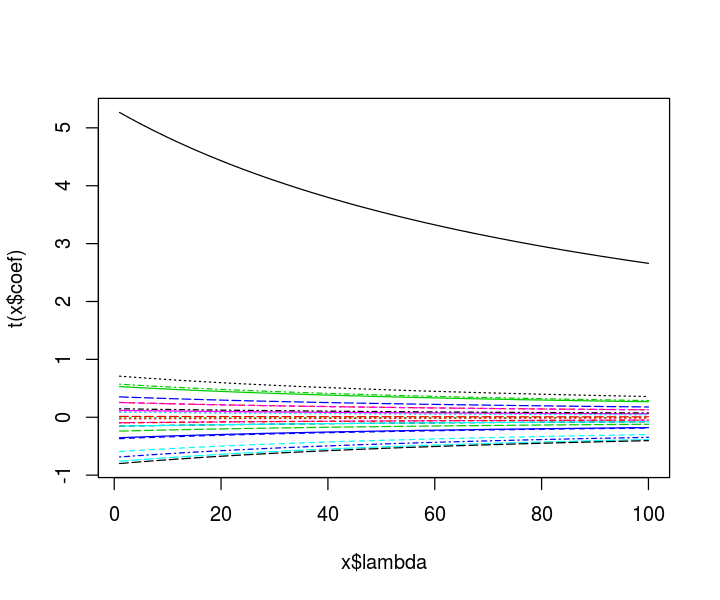

In [96]:
plot(m.rr)

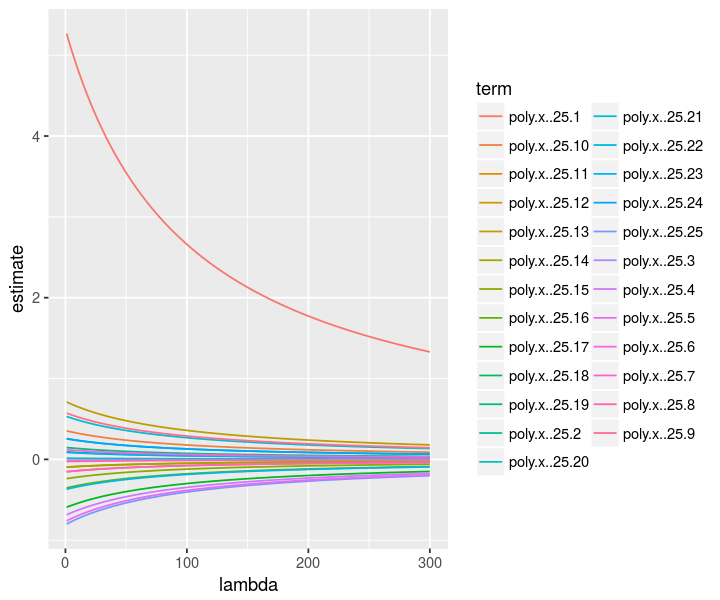

In [97]:
ggplot(td, aes(lambda, estimate, color = term)) + geom_line()

kHKB,kLW,lambdaGCV
10.17041,10.17041,12


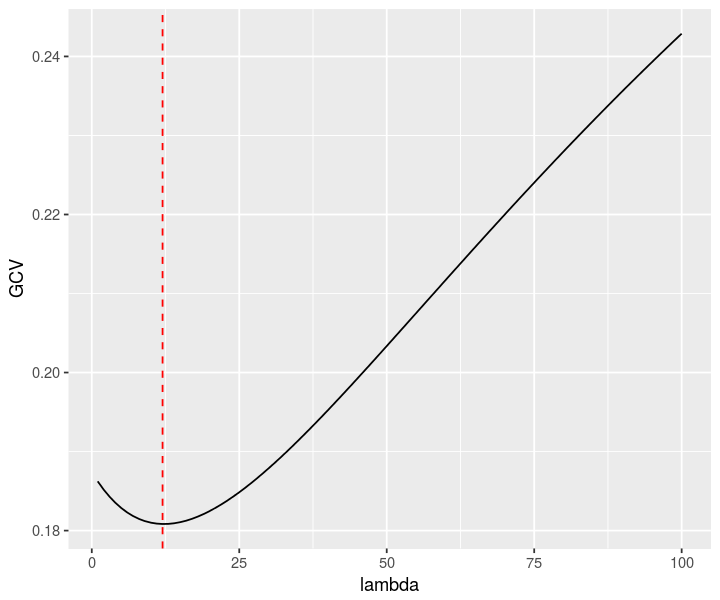

In [100]:
td <- tidy(m.rr)
g <- glance(m.rr)
g

ggplot(td, aes(lambda, GCV)) + geom_line() + geom_vline(xintercept = g$lambdaGCV, col = "red", lty = 2)